# Load model

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras import callbacks

In [2]:
import os
# os.path.abspath('/media/tohn/SSD/Efficient_USAI')
os.chdir('/media/tohn/SSD/FP-A_Nor_ABnor_Network')
!ls
  #choose gpu on processing 
os.environ["CUDA_VISIBLE_DEVICES"]="0" # second gpu  

content


In [3]:
import os
%cd content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
  !git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/media/tohn/SSD/FP-A_Nor_ABnor_Network/content
/media/tohn/SSD/FP-A_Nor_ABnor_Network/content/efficientnet_keras_transfer_learning


In [4]:
import sys
sys.path.append('/media/tohn/SSD/Sub_Efficient_USAI/content/efficientnet_keras_transfer_learning')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

Using TensorFlow backend.


In [5]:
#load model 
from tensorflow.keras.models import load_model
model = load_model("/media/tohn/SSD/Sub_Efficient_USAI/content/efficientnet_keras_transfer_learning/models/Sub_b0_c11_250_R2.h5")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 5, 5, 1280)        4049564   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 13)                16653     
Total params: 4,066,217
Trainable params: 798,093
Non-trainable params: 3,268,124
_________________________________________________________________


In [7]:
model.pop()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 5, 5, 1280)        4049564   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
Total params: 4,049,564
Trainable params: 781,440
Non-trainable params: 3,268,124
_________________________________________________________________


### สร้าง Network ใหม่ 

In [9]:
model2 = models.Sequential()
model2.add(model)
model2.add(layers.Dense(1, activation='sigmoid', name="fc_out"))        #class --> 2
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              4049564   
_________________________________________________________________
fc_out (Dense)               (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 782,721
Non-trainable params: 3,268,124
_________________________________________________________________


### จัดการ data 

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv (r'/home/yupaporn/EfficientNet_USAI/final_training_table.csv')
# df =df[df['Path Crop'] != 'None']
# df.dropna()
df

,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop
0,2053,2053,40,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
1,3682,3682,194,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2,2000,2000,59,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
3,3090,3090,105,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
4,2001,2001,14,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
5,2594,2594,93,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
6,2586,2586,84,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
7,2031,2031,35,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
8,3667,3667,173,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
9,3659,3659,180,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...


In [11]:
#select data 
df1 = df.loc[(df['Abs Position']  == 'P1' ) | (df['Abs Position']  == 'P2')]

In [12]:
msk = np.random.rand(len(df1)) < 0.9
test = df1[~msk] #56
train= df1[msk]#692

In [13]:
print(test.shape)
print(train.shape)
print(df1.shape)

(70, 9)
(678, 9)
(748, 9)


#### การเเบ่งข้อมูล train/validation/test sets 

In [14]:
# The directory where we will
base_dir = './data/views'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)

In [15]:
# Directory with our training cat pictures
train_Nor_dir = os.path.join(train_dir, 'Normal')
os.makedirs(train_Nor_dir, exist_ok=True)
# Directory with our training cat pictures
train_ABn_dir = os.path.join(train_dir, 'ABnormal')
os.makedirs(train_ABn_dir, exist_ok=True)

# Directory with our training cat pictures
validation_Nor_dir = os.path.join(validation_dir, 'Normal')
os.makedirs(validation_Nor_dir, exist_ok=True)
# Directory with our training cat pictures
validation_ABn_dir = os.path.join(validation_dir, 'ABnormal')
os.makedirs(validation_ABn_dir, exist_ok=True)

#Path images of train
Nor_train = train[train['Class']=='Normal']
Nor_path_train = Nor_train['Path Crop'].tolist() 
ABn_train = train[train['Class']=='Abnormal']
ABn_path_train = ABn_train['Path Crop'].tolist() 

Nor_validation = test[test['Class']=='Normal']
Nor_path_validation = Nor_validation['Path Crop'].tolist() 
ABn_validation = test[test['Class']=='Abnormal']
ABn_path_validation= ABn_validation['Path Crop'].tolist() 

#Train
fnames = Nor_path_train  
for fname in fnames:
    dst = os.path.join(train_Nor_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)
    
fnames = ABn_path_train  
for fname in fnames:
    dst = os.path.join(train_ABn_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)
  
 #Validation
fnames = Nor_path_validation 
for fname in fnames:
    dst = os.path.join(validation_Nor_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)

fnames = ABn_path_validation
for fname in fnames:
    dst = os.path.join(validation_ABn_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)

In [16]:
print('Train images total : ',len(Nor_path_train)+len(ABn_path_train))
print('Validation images total : ',len(ABn_path_validation)+len(Nor_path_validation))
print('Total images : ',len(Nor_path_train)+len(ABn_path_train)+len(ABn_path_validation)+len(Nor_path_validation))

Train images total :  678
Validation images total :  70
Total images :  748


#### Hyper parameters  

In [17]:
batch_size = 50 

width = 150 
height = 150 
input_shape = (height, width, 3) #ขนาด image enter

epochs = 20  #จำนวนรอบในการ Train
NUM_TRAIN = len(Nor_path_train)+len(ABn_path_train)  # จำนวนภาพ Train
NUM_TEST = len(ABn_path_validation)+len(Nor_path_validation) #จำนวนภาพ Test
dropout_rate = 0.2 #คือการปิดบาง Node หรือเรียกว่าทำการ Drop Out ไป ซึ่งขึ้นกับการตั้งค่าว่าจะให้ลืมไปกี่เปอร์เซนต์ดี ช่วยในการแก้ปัญหา Overfitting

#### Setting data augmentation 

In [18]:
# data augmentation เพื่อลดโอกาสการเกิด overfitting

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40, # หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, #ซุม image มากสุด 20%
      horizontal_flip=False, #พลิกภาพแบบสุ่มตามแนวนอน
      fill_mode='nearest') 

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to target height and width.
        target_size=(height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='binary')

Found 1489 images belonging to 2 classes.
Found 315 images belonging to 2 classes.


#### Training

In [19]:
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#history คือตัวแปรที่จะทำการเก็บประวัติการ Train Model ของเรา
#คำสั่ง Train
history = model2.fit_generator(
      train_generator,#โหลดdataเข้ามา
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator, #validation_data=(x_valid, y_valid): ใส่ data ที่เราแยกไว้เพื่อดูผล Model ว่าเกิด Overfitting เริ่มที่จุดใด
      validation_steps= NUM_TEST //batch_size,
      verbose=1, #โชว์ผลลัพธ์ 0:ปิด
      use_multiprocessing=True, #ใช้ GPU หลายตัว
      workers=1) #ทำพร้อมกันที่ละ 4 ตัว

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
13/13 [==============================] - 10s 796ms/step - loss: 0.9542 - acc: 0.4883 - val_loss: 0.6477 - val_acc: 0.6000
Epoch 2/20
13/13 [==============================] - 11s 856ms/step - loss: 0.7904 - acc: 0.5931 - val_loss: 0.7134 - val_acc: 0.6000
Epoch 3/20
13/13 [==============================] - 11s 875ms/step - loss: 0.7069 - acc: 0.6338 - val_loss: 0.5542 - val_acc: 0.7400
Epoch 4/20
13/13 [==============================] - 11s 832ms/step - loss: 0.6348 - acc: 0.6745 - val_loss: 0.4320 - val_acc: 0.7600
Epoch 5/20
13/13 [==============================] - 11s 852ms/step - loss: 0.6413 - acc: 0.6823 - val_loss: 0.4577 - val_acc: 0.7600
Epoch 6/20
13/13 [==============================] - 11s 833ms/step - loss: 0.6185 - acc: 0.7058 - val_loss: 0.5282 - val_acc: 0.7200
Epoch 7/20
13/13 [==============================] - 11s 857ms/step - loss: 0.5539 - acc: 0.7492 - val_loss: 0.2675 - val_acc: 

13/13 [==============================] - 11s 875ms/step - loss: 0.4244 - acc: 0.8232 - val_loss: 0.2478 - val_acc: 0.9400
Epoch 16/20
13/13 [==============================] - 11s 855ms/step - loss: 0.4181 - acc: 0.8169 - val_loss: 0.3166 - val_acc: 0.8800
Epoch 17/20
13/13 [==============================] - 11s 843ms/step - loss: 0.3775 - acc: 0.8310 - val_loss: 0.1568 - val_acc: 0.9600
Epoch 18/20
13/13 [==============================] - 11s 871ms/step - loss: 0.3856 - acc: 0.8247 - val_loss: 0.3230 - val_acc: 0.8800
Epoch 19/20
13/13 [==============================] - 11s 817ms/step - loss: 0.3941 - acc: 0.8247 - val_loss: 0.2089 - val_acc: 0.9200
Epoch 20/20
13/13 [==============================] - 11s 844ms/step - loss: 0.3354 - acc: 0.8554 - val_loss: 0.1787 - val_acc: 0.9400


In [20]:
os.makedirs("./models", exist_ok=True)
model2.save('./models/FP_A_small.h5')

# Test Predict

In [45]:
img

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/8.2,8.3 ABNORMAL/8-2 ABNORMAL/cropped/AB082 P1 C070.JPG'

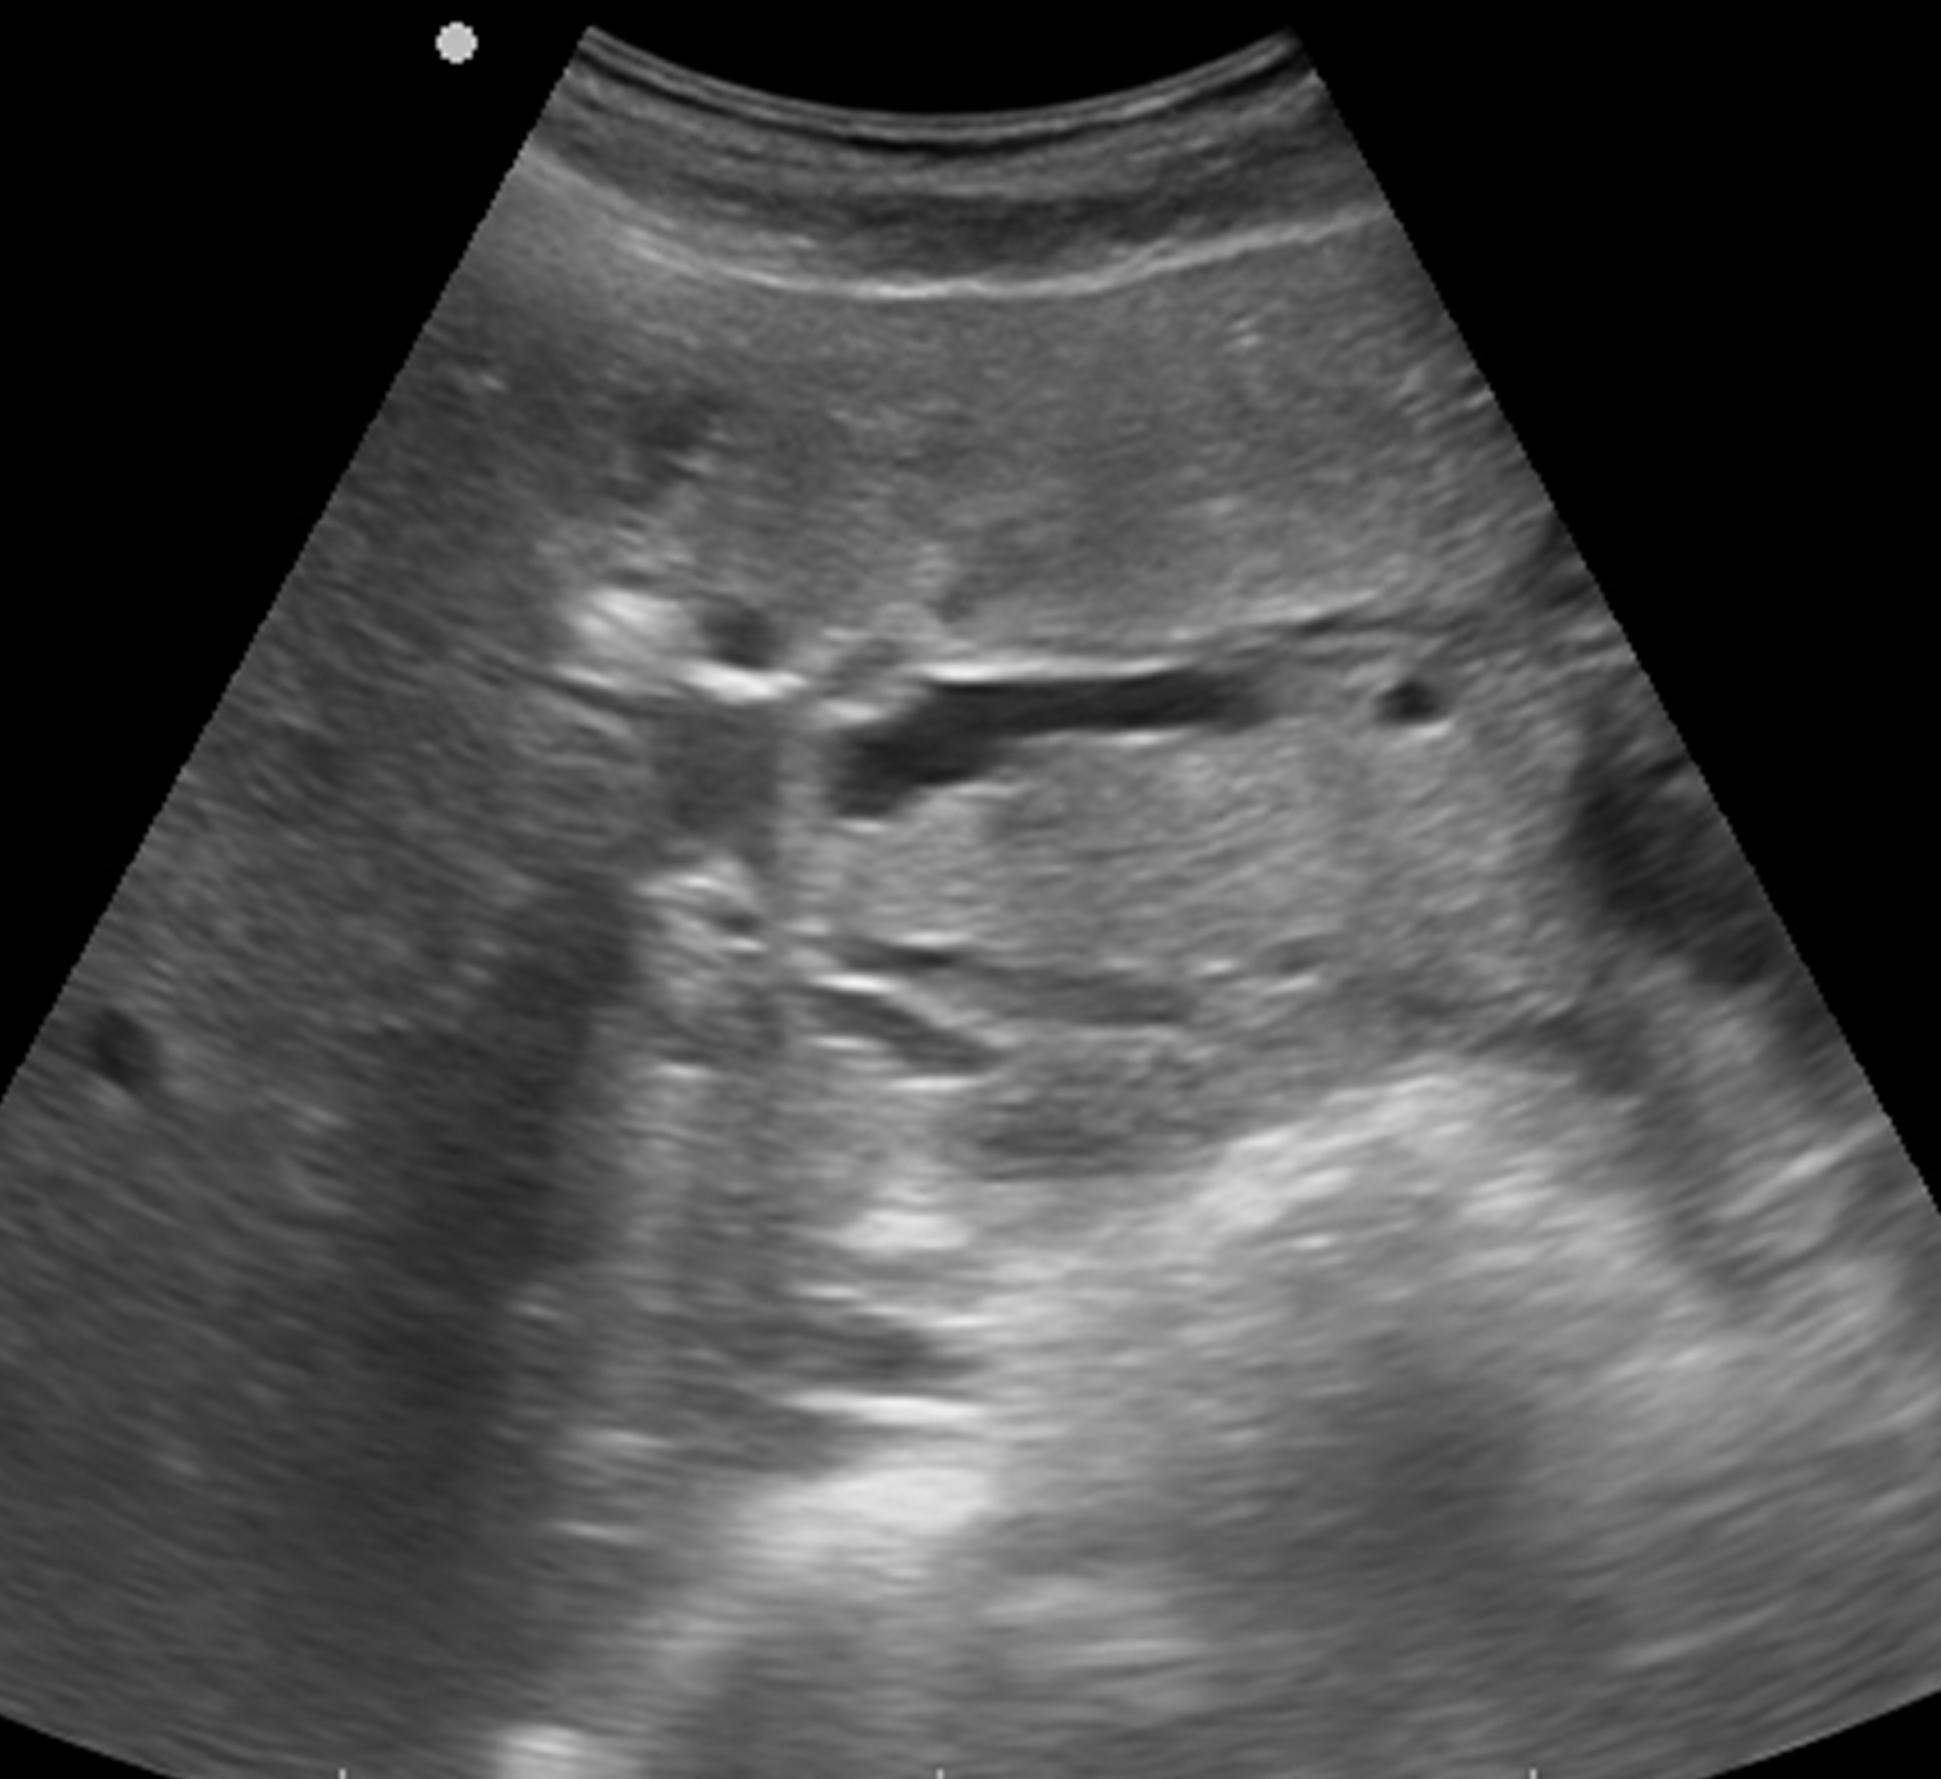

In [44]:
img = ABn_path_validation[-2]
Image(filename=img)

In [37]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model2.predict([x])[0][0]
    if result > 0.5:
        animal = "1"
    else:
        animal = "0"
        result = 1 - result
    return animal,result

print(predict_image(img))

('1', 0.8394811)


In [46]:
# Read the image and resize it
imgs = image.load_img(img, target_size=(height, width))
# Convert it to a Numpy array with target shape.
x = image.img_to_array(imgs)
# Reshape
x = x.reshape((1,) + x.shape)
x /= 255.
result = model2.predict([x])[0][0]

In [47]:
result

0.11375872